<a href="https://colab.research.google.com/github/h0806449f/PyTorch/blob/main/DB_01_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch workflow

1. Data preprocessing
2. Build the model
    2.1 Pick loss function & optimizer
    2.2 Build training loop
3. Fit model to data
4. Make prediction
5. Evaluate the model
6. Improve the model (through experimentation)
7. Save the model (for reload)


In [1]:
import torch
from torch import nn  # nn contains all of PyTorch's buinding blocksof CNN
# https://pytorch.org/docs/stable/nn.html
import matplotlib.pyplot as plt

# check version
torch.__version__

'2.0.1+cu118'

# Data (preparing and loading)

In [2]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02

# Input
X = torch.arange(start, end, step).unsqueeze(dim=1)
# Output
y = weight * X + bias

# 取前 10 檢視
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

# Data preparing : splitting data into training, validation and test datasets
1. training set (always)
2. validation set (not always)
3. test set (always)

In [3]:
len(X), len(y)

(50, 50)

In [4]:
# Create train & test split

# training vs testing 的比例
train_split = int(0.8 * len(X))

# 切割
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

# 檢查資料筆數
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [5]:
def plot_prediction(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):
    # Plots training data, testing data and compare with prediction
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    # Checking if there are predictions
    if predictions is not None:
        # Plot the prediction if exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size":14});

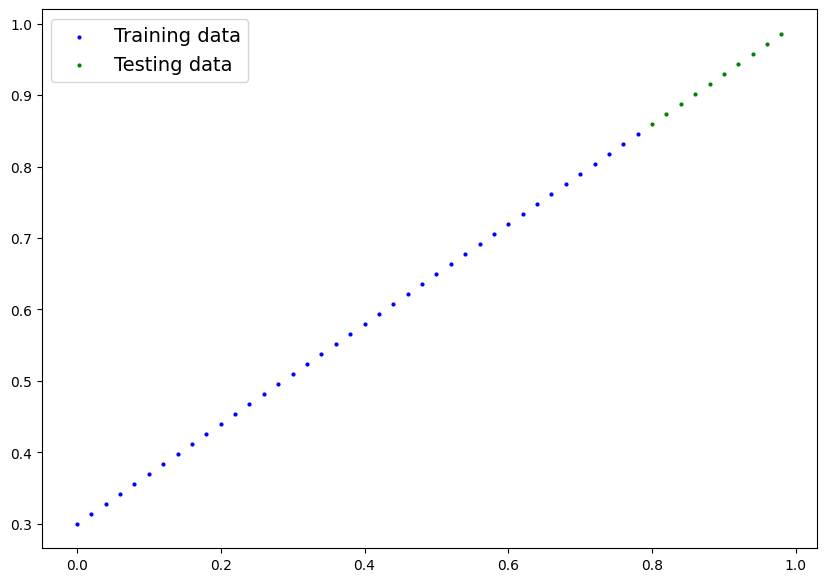

In [6]:
plot_prediction()

# Build model
1. more info: https://pytorch.org/docs/stable/generated/torch.nn.Module.html
2. Pytorch model 元素
    1. torch.nn - contains all of the buildings for neural networl
    2. torch.nn.Parameter - 模型要學習的參數 (通常模型會自動設置)
    3. torch.nn.Module - 神經網絡基本款
        if subclass it, should overwrite forward() 前向傳播過程
    4. torch.optim - optimizers (用於優化梯度下降)
    5. def forward() - All nn.Muodule subclass require to overwrite def forward() 前向傳播
    6. Doc: https://pytorch.org/tutorials/beginner/ptcheat.html
3. 模型
    1. 初始 隨機 weights and bias
    2. 參考 training data “逐步調整” weights and bias
4. 模型如何 “逐步調整”
    1. Gradient descent (梯度下降演算法)
    2. Backpropagation (反向傳播演算法)

In [7]:
from torch import nn

# Create liner regression model class
class LinearRegressionModel(nn.Module):

# subclass nn.Module
    def __init__(self):

        super().__init__()

        # parameter for weight
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))

        # parameter for bias
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    # Forward method : Define the computation in the model
    # 前向傳播
    # 輸入項的資料型態須為 : Tensor
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # Linear regression formula
        return self.weights * x + self.bias

# Check the contents of PyTorch model
1. model.parameters()
2. model.state_dict()

In [8]:
# Create random seed
torch.manual_seed(42)

# Create an nn.Module
model_0 = LinearRegressionModel()

print(model_0.parameters())
print(model_0.state_dict())

<generator object Module.parameters at 0x7f035536fdf0>
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


In [9]:
# Check the parameters in model
print("清單形式: \n", list(model_0.parameters()), "\n" )

#
print("名稱形式: \n", model_0.state_dict())

"""
隨機產生的 weights and bias, 之後模型會逐步調整,
使兩參數越來越接近我們手動設定的 weights and bias
"""

清單形式: 
 [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)] 

名稱形式: 
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


'\n隨機產生的 weights and bias, 之後模型會逐步調整,\n使兩參數越來越接近我們手動設定的 weights and bias\n'

# Make prediction
僅用於測試模型是否能夠運作, 此時的模型還沒有訓練過
-> Loss值會非常大
1. `torch.inference_mode()`  -> preferred
2. `torch.no_grad()`

In [10]:
# inference_mode 會關掉 requires_grad=True 因為這邊用於簡單的顯示資料
with torch.inference_mode():
    y_preds = model_0(X_test)

# 同效果
with torch.no_grad():
    y_preds = model_0(X_test)

print("預測值", y_preds, "\n")
print("真實值", y_test)

預測值 tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]]) 

真實值 tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


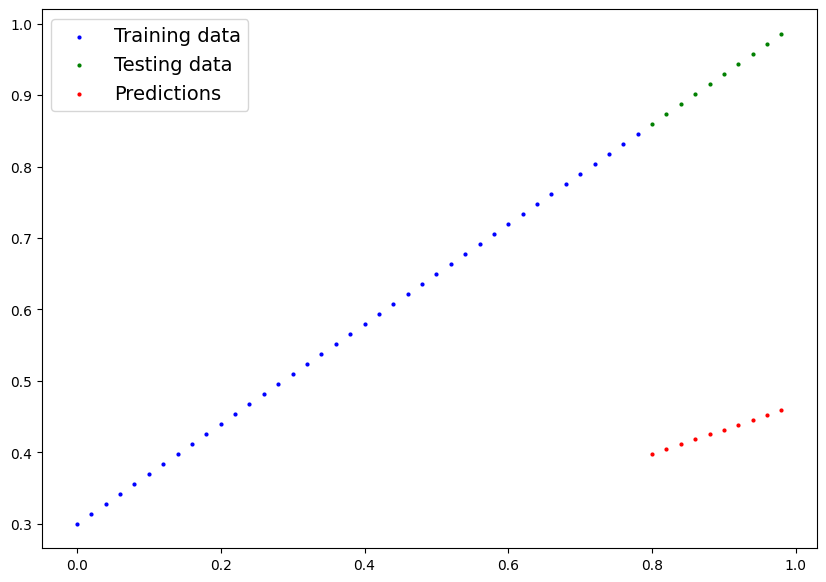

In [11]:
plot_prediction(predictions=y_preds)

# Train model
1. 訓練模型  ->  減少loss
    (loss function 列表 : https://pytorch.org/docs/stable/nn.html#loss-functions)
2. 選擇 loss function 損失函式 (需要依照問題選擇)
3. 選擇 optimizer 優化器

In [12]:
# Setup loss function
loss_fn = nn.L1Loss()  # L1loss -> mean absolute error MAE
print("loss function:", loss_fn, "\n")

# Setup an optimizer
# 優化標的 : 之前的參數產生器
optimizer = torch.optim.Adam(params=model_0.parameters(),
                            # learning rate
                            lr=0.01)
print("優化器", optimizer)

loss function: L1Loss() 

優化器 Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


# Building training loop and testing loop
1. Training Loop
    1. Loop through the data
    2. Forward pass (**向前傳播**)
    3. Calculate the loss
    4. Optimizer zero grad
    5. Loss backward (**向後傳播**)
    6. Optimizer step - use optimizer to adjust model's parameters and then try to improve the loss (**梯度下降**)

2. Testing Loop
    1. Forward pass
    2. Calculate the loss

In [13]:
# 1. Loop through the data
# epochs how many loop through the data
epochs = 301

for epoch in range(epochs):
    # Set the model to training mode
    model_0.train()

    # 2. Forward pass
    # 向前傳播 : 將訓練資料帶入模型, 進行第一次預測
    y_pred = model_0(X_train)

    # 3. Calculate the loss
    # 利用之前設定的損失函式, 計算此次預測的 : loss值
    loss = loss_fn(y_pred, y_train)

    # 4. Optimizer zero grad
    # 使用 optimizer.zero_grad() 將之前儲存的 gradient 歸零，避免累積的 gradient 影響 optimizer 更新參數的方向。
    optimizer.zero_grad()

    # 5. Backward pass (base on the loss)
    # 向後傳播 : 依據 loss值 調整超參數
    loss.backward()

    # 6. Step the optimizer (perform gradient descent)
    # by default, how the optimizer change will acculumate through the loop
    optimizer.step()

    # TESTING !!!
    model_0.eval()

    with torch.inference_mode():  # turn off gradient tracking
        # 1. Forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # Print result & state_dict
    if epoch % 50 == 0:
        print("=" * 50)
        print(f"Epoch: {epoch} | Test_loss: {test_loss}")
        print(model_0.state_dict())

Epoch: 0 | Test_loss: 0.47563618421554565
OrderedDict([('weights', tensor([0.3467])), ('bias', tensor([0.1388]))])
Epoch: 50 | Test_loss: 0.0409594364464283
OrderedDict([('weights', tensor([0.6223])), ('bias', tensor([0.3282]))])
Epoch: 100 | Test_loss: 0.0017547726165503263
OrderedDict([('weights', tensor([0.7035])), ('bias', tensor([0.2987]))])
Epoch: 150 | Test_loss: 0.004743391182273626
OrderedDict([('weights', tensor([0.7020])), ('bias', tensor([0.3030]))])
Epoch: 200 | Test_loss: 0.0004741489829029888
OrderedDict([('weights', tensor([0.7003])), ('bias', tensor([0.3002]))])
Epoch: 250 | Test_loss: 0.0013927280670031905
OrderedDict([('weights', tensor([0.6992])), ('bias', tensor([0.2994]))])
Epoch: 300 | Test_loss: 0.0007162749534472823
OrderedDict([('weights', tensor([0.7002])), ('bias', tensor([0.3005]))])


In [14]:
model_0.state_dict()
# 每run run 一次 epoch -> loss 就會減少
# 原本 : # OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
# OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
# OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
# OrderedDict([('weights', tensor([0.3484])), ('bias', tensor([0.1588]))])
# ....

OrderedDict([('weights', tensor([0.7002])), ('bias', tensor([0.3005]))])

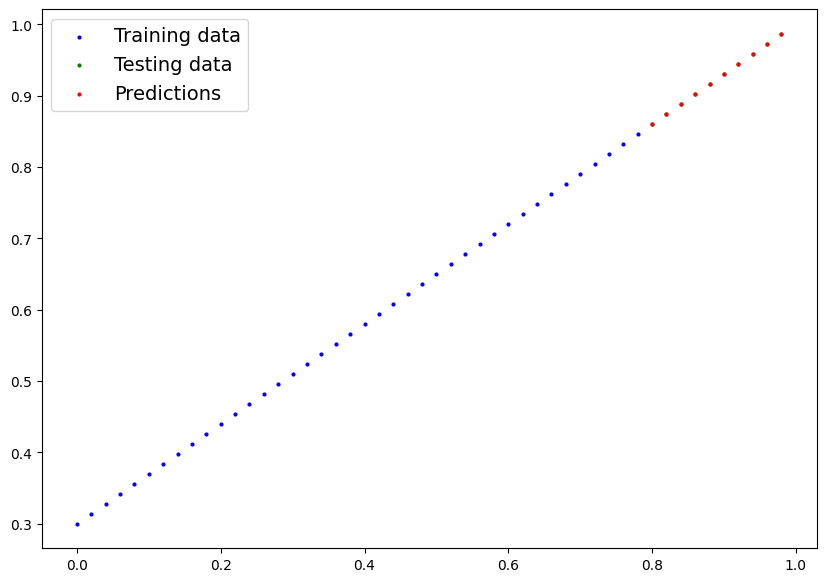

In [15]:
# 圖示
plot_prediction(predictions=test_pred)

# Save the model
1. `torch.save()` - save Pytorch object
2. `torch.load()` - load Pytorch object
3. `torch.nn.Module.load_state_dict()` - load state_dict
4. https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [16]:
# Saving model
from pathlib import Path

# 1. 創立資料夾
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. model name
MODEL_NAME = "workflow_model_0.pt"  # (.pt or .pth 都可以)

# 3. 儲存路徑
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 4. Save model's state_dict
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

In [17]:
# 5. Load model's state_dict

# To load in a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0
# update the new instance with updated parameters
print("Before loaded the model_0's state_dict")
print(loaded_model_0.state_dict())

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

print("\nAfter")
print(loaded_model_0.state_dict())

Before loaded the model_0's state_dict
OrderedDict([('weights', tensor([0.2345])), ('bias', tensor([0.2303]))])

After
OrderedDict([('weights', tensor([0.7002])), ('bias', tensor([0.3005]))])


In [18]:
# 6. Use loaded_model_0 predict again
loaded_model_0.eval()

with torch.inference_mode():
    latest_preds = loaded_model_0(X_test)

In [19]:
# 檢查是否與原本模型預測內容一致
print(test_pred == latest_preds)

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])


# Recap

In [20]:
# Import
import torch
from torch import nn
import matplotlib.pyplot as plt

In [30]:
# Data
weight = 0.8
bias = 0.2

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias

In [31]:
# Split data
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [32]:
# Build model (layer)
class LinearRegressionModel_1(nn.Module):
    def __init__(self):
        super().__init__()

        # use nn.Linear() creating parameters
        # 1 feature in & 1 feature out
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)


    def forward(self, x : torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

model_1 = LinearRegressionModel_1()

In [33]:
# Check mdoel
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.8692]])),
             ('linear_layer.bias', tensor([0.1872]))])

In [34]:
# Set loss function
loss_fn = nn.L1Loss()

In [35]:
# Set optimizer
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.01)

In [36]:
# Build : training & testing loop
epochs = 251

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # TEST
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    if epoch % 50 == 0:
        print("=" * 50)
        print(f"Epoch: {epoch} | Test_loss: {test_loss}")
        print(model_1.state_dict())

Epoch: 0 | Test_loss: 0.029843907803297043
OrderedDict([('linear_layer.weight', tensor([[0.8592]])), ('linear_layer.bias', tensor([0.1772]))])
Epoch: 50 | Test_loss: 0.0001330196828348562
OrderedDict([('linear_layer.weight', tensor([[0.8017]])), ('linear_layer.bias', tensor([0.1983]))])
Epoch: 100 | Test_loss: 0.004145777318626642
OrderedDict([('linear_layer.weight', tensor([[0.8040]])), ('linear_layer.bias', tensor([0.2006]))])
Epoch: 150 | Test_loss: 0.0020293891429901123
OrderedDict([('linear_layer.weight', tensor([[0.7994]])), ('linear_layer.bias', tensor([0.1985]))])
Epoch: 200 | Test_loss: 0.0015530467499047518
OrderedDict([('linear_layer.weight', tensor([[0.7997]])), ('linear_layer.bias', tensor([0.1987]))])
Epoch: 250 | Test_loss: 0.0024042963050305843
OrderedDict([('linear_layer.weight', tensor([[0.8018]])), ('linear_layer.bias', tensor([0.2008]))])


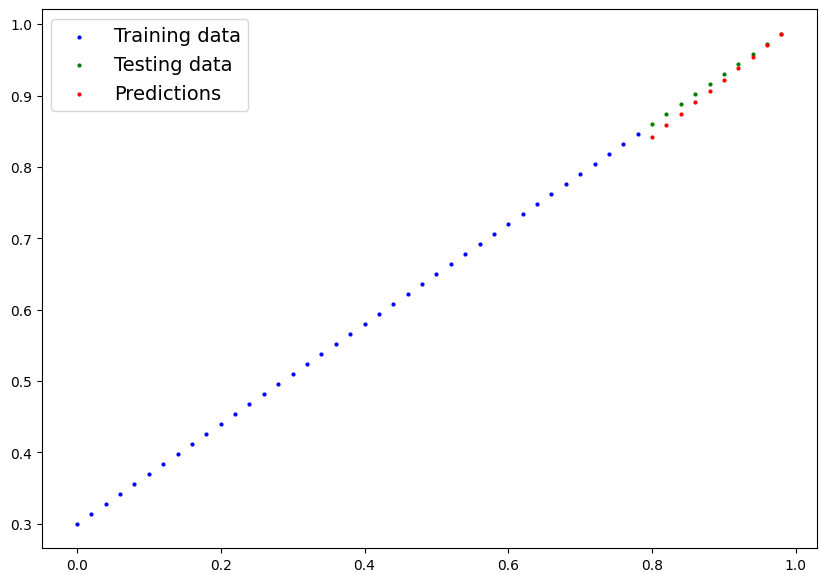

In [38]:
plot_prediction(predictions=test_pred)